In [63]:
import json
import pandas as pd    
from IPython.display import JSON

data = []

for i in range(1,5):
    filename = "data_" + str(i) + ".json"
    # Opening JSON file
    f = open(filename)

    # returns JSON object as 
    # a dictionary
    data_json = json.load(f)
    print(len(data_json))
    data.append(data_json)

    f.close()

1796
2278
1994
2171


In [85]:
df = []

for d in data:
    djs = pd.json_normalize(d)
    djs = djs['ClaimBucket.claimIssue.description']
    djs.name = "description"
    
    df.append(djs)

In [109]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import everygrams
from nltk.tokenize import sent_tokenize

plotArray = []

for d in df:
    filteredFdistTrigram = FreqDist()

    stop_words = set(stopwords.words('turkish'))

    for text in d:    
        sentences = sent_tokenize(text.lower())
        for sentence in sentences:
            word_tokens = word_tokenize(sentence.lower())
            filtered_sentence = []

            for w in word_tokens:
                if w not in stop_words and w.isalnum():
                    filtered_sentence.append(w)
            
            listedGrams = everygrams(filtered_sentence, 4, 4)
            filteredGrams = []
            
            for l in listedGrams:
                for x in l:
                    if "ürün" in x or "kusur" in x:
                        filteredGrams.append(l)
            
            filteredFdistTrigram += nltk.FreqDist(filteredGrams)
    
    plotArray.append(filteredFdistTrigram)

In [110]:
for index, p in enumerate(plotArray):
    print("SellerId: ", index)
    print("total word count: ", p.N())
    print("unique word count: ", p.B())
    print("\n")

SellerId:  0
total word count:  9659
unique word count:  71


SellerId:  1
total word count:  22281
unique word count:  72


SellerId:  2
total word count:  4395
unique word count:  98


SellerId:  3
total word count:  14484
unique word count:  413




SellerId:  0


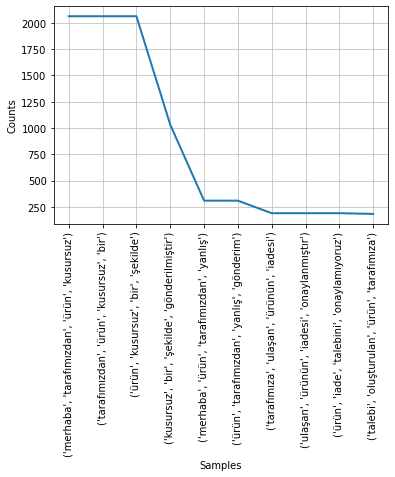

SellerId:  1


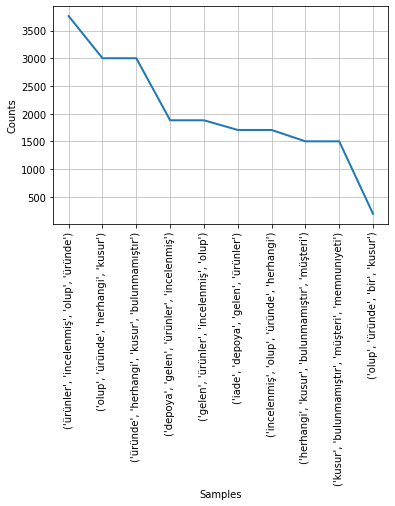

SellerId:  2


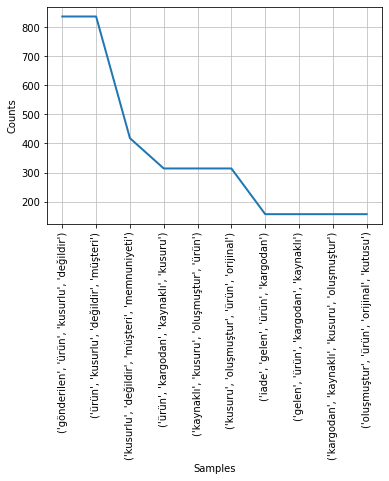

SellerId:  3


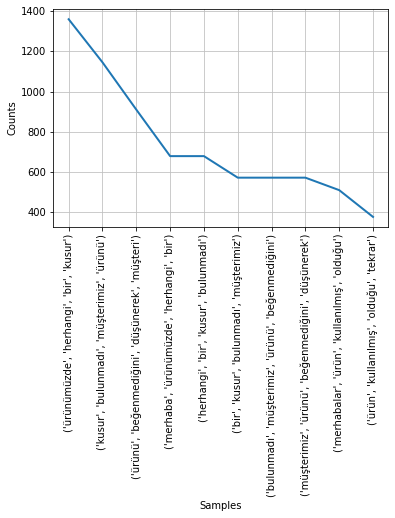

In [111]:
for index, p in enumerate(plotArray):
    print("SellerId: ", index)
    p.plot(10)